# **Sentiment Analysis using Traditional and Deep Learning Models**

**I. Dataset Selection and Exploratory Data Analysis**

**A.Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

In [3]:
# Downloading NLTK resources
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**B. Loading the Dataset**

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data/rt_reviews.csv', encoding='latin1')


In [5]:
print(df.head())

  Freshness                                             Review
0     fresh   Manakamana doesn't answer any questions, yet ...
1     fresh   Wilfully offensive and powered by a chest-thu...
2    rotten   It would be difficult to imagine material mor...
3    rotten   Despite the gusto its star brings to the role...
4    rotten   If there was a good idea at the core of this ...


**C.Exploratory Data Analysis: Basic Statistics**

In [6]:
# --- Basic Statistics ---
print(df['Freshness'].value_counts())
print(df['Review'].str.len().describe())


Freshness
fresh     240000
rotten    240000
Name: count, dtype: int64
count    480000.000000
mean        131.729433
std          54.873626
min          18.000000
25%          90.000000
50%         130.000000
75%         170.000000
max         287.000000
Name: Review, dtype: float64


**D. Data Cleaning**

In [7]:
# --- Missing Values ---
print(df.isnull().sum())

Freshness    0
Review       0
dtype: int64


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
# --- Duplicates ---
print(df.duplicated().sum())

0


In [10]:
# --- Dataframe Info ---
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 339716 entries, 0 to 479999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Freshness  339716 non-null  object
 1   Review     339716 non-null  object
dtypes: object(2)
memory usage: 7.8+ MB
None


**E. Data Visualizations**

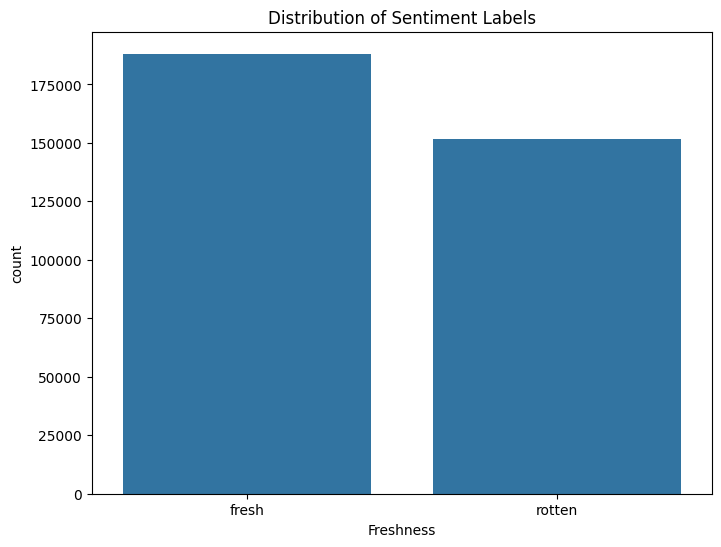

In [11]:
# --- Class Distributions ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Freshness', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()



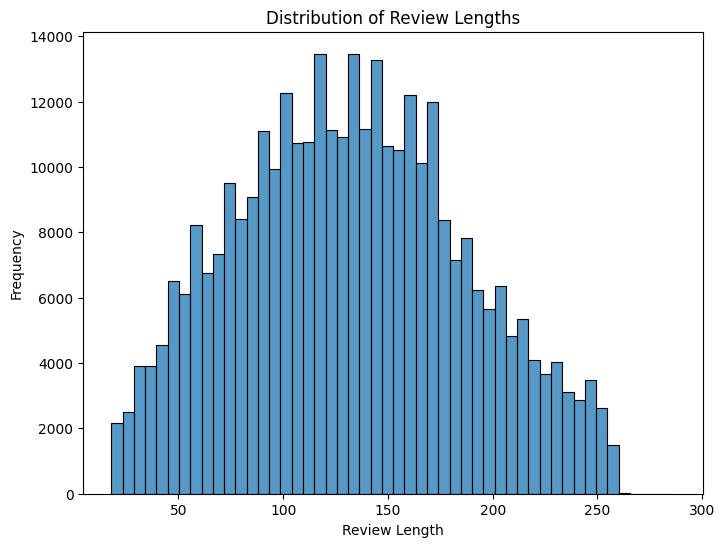

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Review'].str.len(), bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()



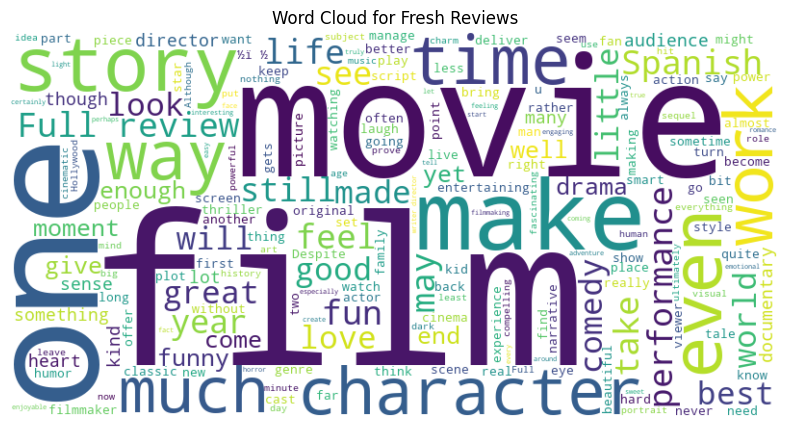

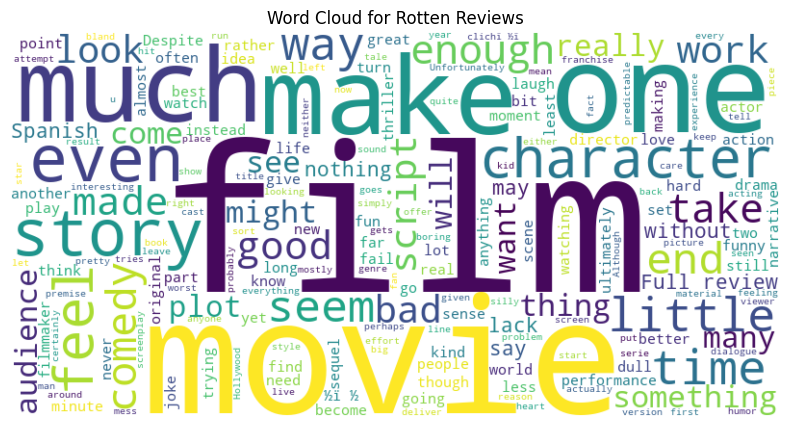

In [13]:
# --- Word Clouds ---
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

positive_reviews = ' '.join(df[df['Freshness'] == 'fresh']['Review']) 
negative_reviews = ' '.join(df[df['Freshness'] == 'rotten']['Review']) 
create_wordcloud(positive_reviews, 'Word Cloud for Fresh Reviews')
create_wordcloud(negative_reviews, 'Word Cloud for Rotten Reviews')



In [14]:
# --- Data Inspection ---
print("First 5 reviews:")
print(df['Review'].head())



First 5 reviews:
0     Manakamana doesn't answer any questions, yet ...
1     Wilfully offensive and powered by a chest-thu...
2     It would be difficult to imagine material mor...
3     Despite the gusto its star brings to the role...
4     If there was a good idea at the core of this ...
Name: Review, dtype: object


In [15]:
# --- Text Cleaning ---
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)  # Remove punctuation
    text = text.lower()  # Lowercasing
    text = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    text = ' '.join(text)
    return text

df['cleaned_text'] = df['Review'].apply(clean_text)

print("\nFirst 5 cleaned reviews:")
print(df['cleaned_text'].head())


First 5 cleaned reviews:
0    manakamana doesnt answer questions yet makes p...
1    wilfully offensive powered chestthumping machi...
2    would difficult imagine material wrong spade l...
3    despite gusto star brings role hard ride shotg...
4    good idea core film buried unsightly pile flat...
Name: cleaned_text, dtype: object
